
<center>
<hr>
<hr>
<font style="font-size:5.4em ; color:black'" > 
<span style="background : yellow">
#5-1 Regression
</span>
</font>
<hr>
<hr>
</center>


In [1]:
%matplotlib inline
from IPython.display import display,Latex,Math,HTML
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<center>
<hr>
<font size="20" color='Blue'>Linear Regression</font>
<hr>
</center>


### Example 17.1 Linear Regression

In [2]:
xi = np.array([1,2,3,4,5,6,7])
yi = np.array([0.5,2.5,2.0,4.0,3.5,6.0,5.5])

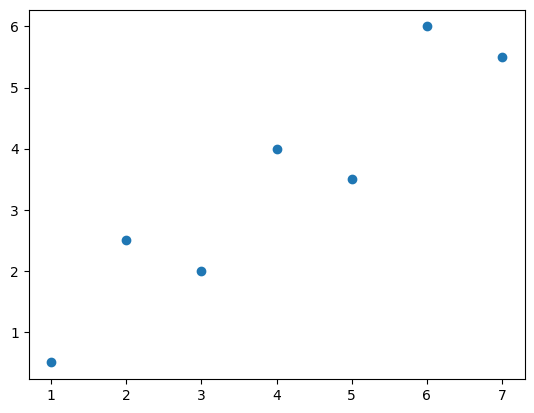

In [3]:
fig, ax = plt.subplots()
scatter = ax.scatter(xi, yi)


In [4]:
def param(x,y):
    n = len(xi)

    sum_xi = np.sum(xi)
    sum_yi = np.sum(yi)
    sum_xi_yi = np.sum(xi*yi)
    sum_xi_2 = np.sum(xi**2)
    sum_yi_2 = np.sum(yi**2)
    mean_xi = np.mean(xi)
    mean_yi = np.mean(yi)

    a1 = (n*sum_xi_yi - sum_xi*sum_yi)/(n*sum_xi_2 - sum_xi**2)
    a0 = mean_yi - a1*mean_xi

    return a0, a1

a0, a1 = param(xi,yi)
print(a0, a1)

0.07142857142857117 0.8392857142857143


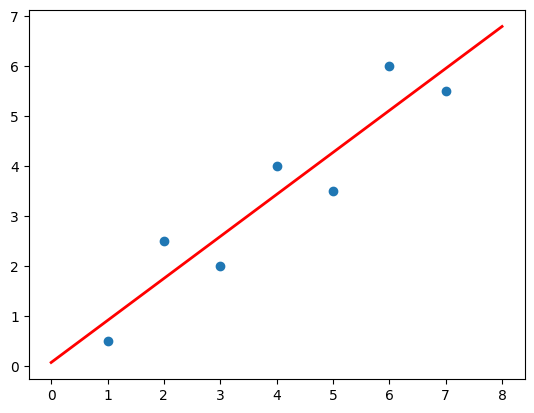

In [5]:
fig, ax = plt.subplots()
scatter = ax.scatter(xi, yi)
xarray = np.linspace(0, 8, 100)
yarray = a0 + a1*xarray
line = ax.plot(xarray,yarray, 'r', lw=2)


<center>
<hr>
<font size="20" color='Blue' >Polynomial Regression</font>
<hr>
</center>

### Example 17.5 Polynomial Regression

#### Problem Statement : 
> - Fit a second-order polynomial to the data in the first two columns of Table 17.4


In [6]:
Latex(f""" \\begin{{equation*}} \\Huge
      y = {{a_0}} + {{a_1}}x+{{a_2}}x^2
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

#### Solution : 

In [7]:
xi = np.array([0,1,2,3,4,5])
yi = np.array([2.1,7.7,13.6,27.2,40.9,61.1])

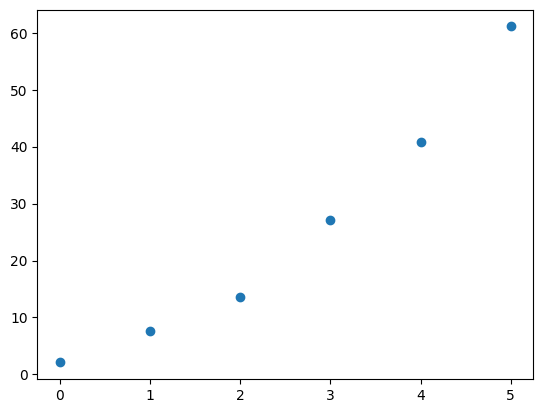

In [8]:
fig, ax = plt.subplots()
scatter = ax.scatter(xi, yi)


In [9]:
def param2(x,y):
    n = len(xi)

    mean_xi = np.mean(xi)
    mean_yi = np.mean(yi)

    sum_xi = np.sum(xi)
    sum_yi = np.sum(yi)

    sum_xi_2 = np.sum(xi**2)
    sum_yi_2 = np.sum(yi**2)

    sum_xi_3 = np.sum(xi**3)
    sum_xi_4 = np.sum(xi**4)

    sum_xi_yi = np.sum(xi*yi)
    sum_xi2_yi = np.sum(xi**2*yi)

    A = np.array([[n, sum_xi, sum_xi_2], [sum_xi, sum_xi_2, sum_xi_3], [sum_xi_2, sum_xi_3, sum_xi_4]])
    B = np.array([sum_yi, sum_xi_yi, sum_xi2_yi])
    a = np.linalg.solve(A, B)

    print(f'A = \\\n {A}')
    print(f'B = {B}')
    print(f'a = {a}')

    return a

a0, a1, a2 = param2(xi,yi)

A = \
 [[  6  15  55]
 [ 15  55 225]
 [ 55 225 979]]
B = [ 152.6  585.6 2488.8]
a = [2.47857143 2.35928571 1.86071429]


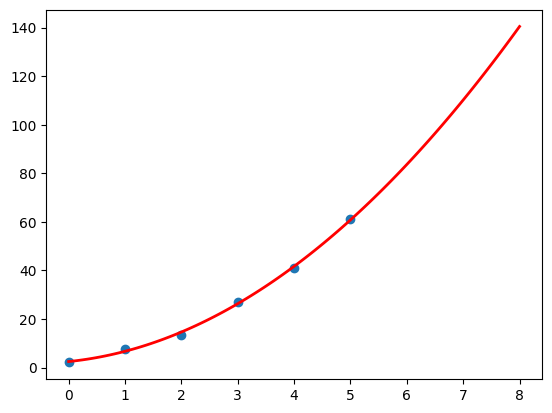

In [10]:
fig, ax = plt.subplots()
scatter = ax.scatter(xi, yi)
xarray = np.linspace(0, 8, 100)
yarray = a0 + a1*xarray + a2*xarray**2
line = ax.plot(xarray,yarray, 'r', lw=2)


<center>
<hr>
<font size="20" color='Blue' >Nonlinear Regression</font>
<hr>
</center>

### Example 17.8 Gauss-Newton Method

#### Problem Statement : 
Fit the following function f(x; a0, a1)  to the data:


In [11]:
Latex(f""" \\begin{{equation*}} \\huge
      f(x;{{a_0}},{{a_1}}) = a_0(1-e^{{-a_1x}})
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

In [12]:
Latex(""" \\begin{equation*} \\huge
      S_r = \\sum_{i=1}^{n} (y_i - a_0(1-e^{-a_1x_i}))^2
      \\end{equation*}
      """)

<IPython.core.display.Latex object>

In [13]:
Latex(""" \\begin{equation*} \\huge
      {\\partial S_r \\over \\partial a_0} = \\sum_{i=1}^{n} 2(y_i - a_0(1-e^{-a_1x_i}))(-1)(1-e^{-a_1x_i})=0
      \\end{equation*}
      """)

<IPython.core.display.Latex object>

In [14]:
Latex(""" \\begin{equation*} \\huge
      {\\partial S_r \\over \\partial a_1} = \\sum_{i=1}^{n} 2(y_i - a_0(1-e^{-a_1x_i}))a_0 x_i(1-e^{-a_1x_i})^2=0
      \\end{equation*}
      """)

<IPython.core.display.Latex object>

In [15]:
Latex(""" \\begin{equation*} \\huge
      a_0 = {\\sum_{i=1}^{n} y_i(1-e^{-a_1x_i}) \\over \\sum_{i=1}^{n} (1-e^{-a_1x_i})^2}
      \\end{equation*}
      """)

<IPython.core.display.Latex object>

In [16]:
Latex(""" \\begin{equation*} \\Large
      g(a_1) = \\sum_{i=1}^{n} (y_i - {{\\sum_{i=1}^{n} (1-e^{-a_1x_i})^2 \\over \\sum_{i=1}^{n} y_i(1-e^{-a_1x_i})}}(1-e^{-a_1x_i})) {{\\sum_{i=1}^{n} (1-e^{-a_1x_i})^2 \\over \\sum_{i=1}^{n} y_i(1-e^{-a_1x_i})}} x_i(1-e^{-a_1x_i})^2=0
      \\end{equation*}
      """)

<IPython.core.display.Latex object>

In [17]:
xi = np.array([0.25+i*0.5 for i in range(5)])
yi = np.array([0.28,0.57,0.68,0.74,0.79])
print(xi,yi)

[0.25 0.75 1.25 1.75 2.25] [0.28 0.57 0.68 0.74 0.79]


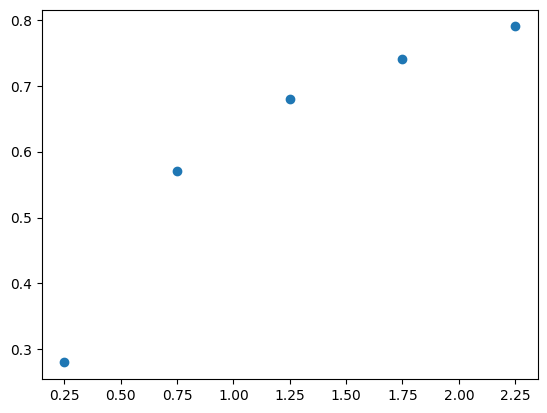

In [18]:
fig, ax = plt.subplots()
scatter = ax.scatter(xi, yi)


In [19]:
def func_a0(x,y,a1):
    return np.sum(y*(1-np.exp(-a1*x)))/np.sum((1-np.exp(-a1*x))**2)

In [20]:
def gfunc(x, y, a1):
    n = len(xi)
    a0 = func_a0(x,y,a1)

    return np.sum((y - a0*(1-np.exp(-a1*x)))*(a0*x*(1-np.exp(-a1*x))**2))

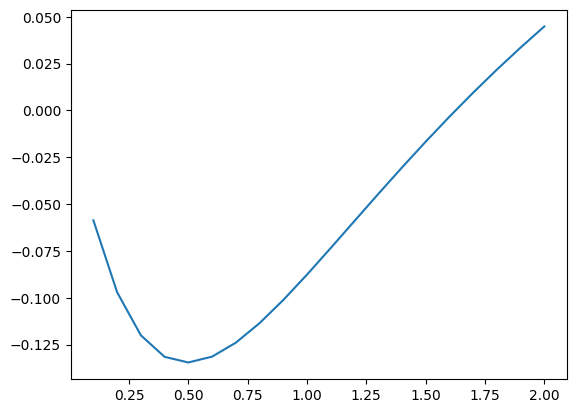

In [21]:
xx = np.array([0.1+i*0.1 for i in range(20)])
yy = np.array([gfunc(xi, yi, a1) for a1 in xx])

fig2, ax2 = plt.subplots()
line, = ax2.plot(xx, yy)

In [22]:
xx = [1.0, 1.1]
x0,x1 = xx[0],xx[1]
for i in range(0,10):
    if abs(gfunc(xi,yi,x0) - gfunc(xi,yi,x1)) < 1e-14: 
        break
    x = x0 - gfunc(xi,yi,x0)*(x0-x1)/(gfunc(xi,yi,x0) - gfunc(xi,yi,x1))
    print(f"{i+1:2} : x0 = {x0:0.5f}, x1 = {x1:.5f}  f(x) = {gfunc(xi,yi,x):.4e}")
    x0 = x1
    x1 = x
    xx.append(x)

 1 : x0 = 1.00000, x1 = 1.10000  f(x) = -1.0771e-03
 2 : x0 = 1.10000, x1 = 1.61760  f(x) = -7.7272e-05
 3 : x0 = 1.61760, x1 = 1.62530  f(x) = -1.2532e-07
 4 : x0 = 1.62530, x1 = 1.62589  f(x) = -1.4651e-11
 5 : x0 = 1.62589, x1 = 1.62589  f(x) = -9.3675e-17
 6 : x0 = 1.62589, x1 = 1.62589  f(x) = 1.4919e-16


a0 = 0.79786, a1 = 1.62589


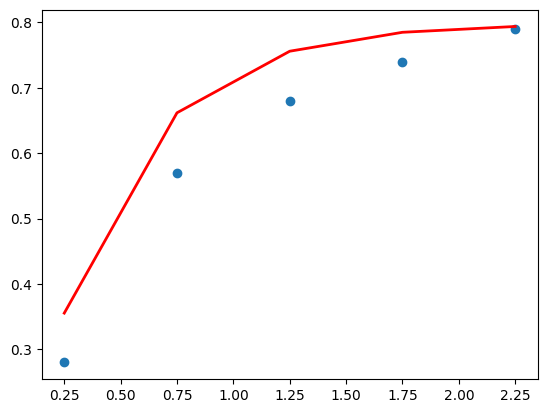

In [23]:
a0 = func_a0(xi,yi,x1)
print(f"a0 = {a0:.5f}, a1 = {x1:.5f}")
fig, ax = plt.subplots()
scatter = ax.scatter(xi, yi)
line, = ax.plot(xi, a0*(1-np.exp(-a1*xi)), 'r', lw=2)

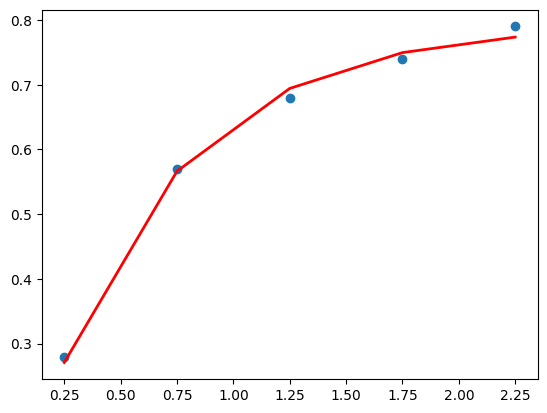

In [24]:
a0,a1 = [0.79186, 1.6751]
fig, ax = plt.subplots()
scatter = ax.scatter(xi, yi)
line, = ax.plot(xi, a0*(1-np.exp(-a1*xi)), 'r', lw=2)

<center>
<hr>
<font size="20" color='Blue' >The end...</font>
<hr>
</center>